In [1]:
import seaborn as sns
penguins = sns.load_dataset('penguins')

1. 범주형 속성만을 선택하여 속성 별로 가장 빈번한 값과 빈도를 확인하시오. (10점)

---



In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# 1. 범주형 속성의 최빈값(top)과 빈도(freq)
cat_data = penguins[['species', 'island', 'sex']]
cat_data.describe()

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


2. 수치형 속성만을 선택하여 Z점수 표준화를 적용하시오. (20점)

In [4]:
# 2. 수치형 속성 선택, Z점수 표준화 적용
num_data = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

def zscore_standize(arr):
  return (arr - arr.mean())/(arr.std())

num_data.apply(zscore_standize)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.883205,0.784300,-1.416272,-0.563317
1,-0.809939,0.126003,-1.060696,-0.500969
2,-0.663408,0.429833,-0.420660,-1.186793
3,NaN,NaN,NaN,NaN
4,-1.322799,1.088129,-0.562890,-0.937403
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,0.527159,-1.443781,1.001641,0.808332
341,1.186550,-0.734846,1.499447,1.930590
342,0.234097,-1.190590,0.788296,1.244766


3. 수치형 속성 중 누락값이 있는지 확인하고 누락값을 열별 중앙값으로 채우는 전처리를 하시오. (10점)

In [5]:
# 3. 수치형 속성 중 누락값 확인, 누락값을 열별 중앙값으로 채우기
num_data.isnull().value_counts()

,,,,count
bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,
False,False,False,False,342
True,True,True,True,2


In [ ]:
import pandas as pd
num_data.fillna(value=num_data.median())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10,18.7,181.0,3750.0
1,39.50,17.4,186.0,3800.0
2,40.30,18.0,195.0,3250.0
3,44.45,17.3,197.0,4050.0
4,36.70,19.3,193.0,3450.0
...,...,...,...,...
339,44.45,17.3,197.0,4050.0
340,46.80,14.3,215.0,4850.0
341,50.40,15.7,222.0,5750.0
342,45.20,14.8,212.0,5200.0


In [6]:
num_data.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [ ]:
#penguins[] =
num_data.fillna(value=num_data.median())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10,18.7,181.0,3750.0
1,39.50,17.4,186.0,3800.0
2,40.30,18.0,195.0,3250.0
3,44.45,17.3,197.0,4050.0
4,36.70,19.3,193.0,3450.0
...,...,...,...,...
339,44.45,17.3,197.0,4050.0
340,46.80,14.3,215.0,4850.0
341,50.40,15.7,222.0,5750.0
342,45.20,14.8,212.0,5200.0


4. 펭귄 종(species) 별 데이터의 건수가 균등분포를 이루는지 확인하기 위한 시각화를 하시오. (20점)

In [ ]:
species = penguins[['species']].value_counts()
species

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


<Axes: xlabel='species', ylabel='Count'>

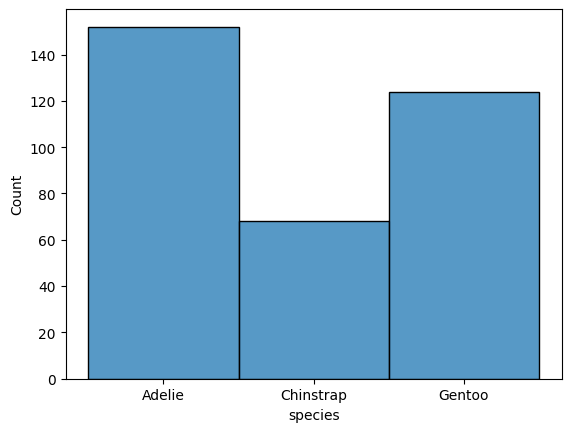

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='species', data=cat_data)

5. 펭귄 종(species) 별, 서식하는 지역(island) 별 발갈퀴의 길이(flipper_length_mm) 평균을 표로 정리하시오. (20점)

6. 세 종류의 펭귄 종(species) 각각에 대하여 체중(body_mass_g)의 이상치가 있는지 시각화하시오. (20점)

In [ ]:
body_mass_g = penguins[['body_mass_g']]
body_mass_g

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
3,NaN
4,3450.0
...,...
339,NaN
340,4850.0
341,5750.0
342,5200.0


In [ ]:
penguins.fillna(value=body_mass_g.mean(), inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,NaN
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,Female


In [ ]:
sns.boxplot(data=penguins, x="species", y="weight")

ValueError: Could not interpret value `weight` for `y`. An entry with this name does not appear in `data`.